In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Poisson Distribution ##

We know that when $n$ is large and $p$ is small, the chance of $k$ successes in $n$ i.i.d. Bernoulli $(p)$ trials is roughly

$$
P(k) ~ \approx ~ e^{-\mu} \frac{\mu^k}{k!}, ~~ k = 0, 1, 2, \ldots, n
$$
where $\mu = np$.

The terms in the approximation are proportional to terms in the series expansion of $e^\mu$, but *that expansion is infinite*. It doesn't stop at $n$, so we won't either. 

A little care is required before we go further. First, we must state the additivity axiom of probability theory in terms of countably many outcomes:

If events $A_1, A_2, \ldots$ are mutually exclusive, then

$$
P(\bigcup_{i=1}^\infty A_i) ~ = ~ \sum_{i=1}^\infty P(A_i)
$$

This is called the *countable additivity* axiom, in contrast to the finite additivity axiom we have thus far assumed. It doesn't follow from finite additivity, but of course finite additivity follows from it. 

In this course, we will not go into the technical aspects of countable additivity and the existence of probability functions that satisfy the axioms on the spaces that interest us. But those technical aspects do have to be studied before you can develop a deeper understanding of probability theory. If you want to do that, a good start is to take Real Analysis and then Measure Theory.

While in this course, you don't have to worry about it. Just assume that all our work is consistent with the axioms. 

Here is our first infinite valued distribution.

In [2]:
# VIDEO: Poisson Distribution
from IPython.display import YouTubeVideo

YouTubeVideo('mc9r6cgXaHY')

### Poisson Probabilities ###
A random variable $X$ has the *Poisson distribution with parameter $\mu > 0$* if

$$
P(X = k) ~ = ~ e^{-\mu} \frac{\mu^k}{k!}, ~~~~ k = 0, 1, 2, \ldots
$$

The terms are proportional to the terms in the infinte series expansion of $e^{\mu}$. These terms $\frac{\mu^k}{k!}$ for $k \ge 0$ determine the shape of the distribution.

The constant of proportionality is $e^{-\mu}$. It doesn't affect the shape of the histogram. It just ensures that the probabilities add up to 1.

$$
\sum_{k=0}^\infty P(X = k) 
~ = ~ \sum_{k=0}^\infty e^{-\mu} \frac{\mu^k}{k!} 
~ = ~ e^{-\mu} \sum_{k=0}^\infty \frac{\mu^k}{k!} 
~ = ~ e^{-\mu} \cdot e^{\mu} ~ = ~ 1
$$ 

Keep in mind that the Poisson is a distribution in its own right. It does not have to arise as a limit, though it is sometimes helpful to think of it that way. Poisson distributions are often used to model counts of rare events, not necessarily arising out of a binomial setting.

```{admonition} Quick Check
The number of raisins in a cookie has the Poisson $(3)$ distribution. Find the chance that there are more than 4 raisins in the cookie. Don't leave infinite sums in your answer.

```

```{admonition} Answer
:class: dropdown
$1 - \sum_{k=0}^4 e^{-3}\frac{3^k}{k!}$

```

### An Interpretation of the Parameter ###
To understand the parameter $\mu$ of the Poisson distribution, a first step is to notice that mode of the distribution is just around $\mu$. Here is an example where $\mu = 3.74$. No computing system can calculate infinitely many probabilities, so we have just calculated the Poisson probabilities till the sum is close enough to 1 that the `prob140` library considers it a Distribution object. 

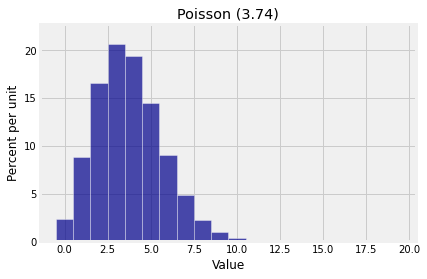

In [3]:
mu = 3.74
k = range(20)
poi_probs_374 = stats.poisson.pmf(k, mu)
poi_dist_374 = Table().values(k).probabilities(poi_probs_374)
Plot(poi_dist_374)
plt.title('Poisson (3.74)');

The mode is 3. To find a formula for the mode, follow the process we used for the binomial: calculate the consecutive odds ratios, notice that they are decreasing, and see where they cross 1. This is left to you as an exercise. Your calculations should conclude the following:

The **mode** of the Poisson distribution is the integer part of $\mu$. That is, the most likely value is $\mu$ rounded *down* to an integer. If $\mu$ is an integer, both $\mu$ and $\mu - 1$ are modes.

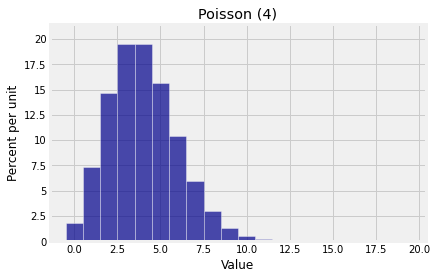

In [4]:
mu = 4
k = range(20)
poi_probs_4 = stats.poisson.pmf(k, mu)
poi_dist_4 = Table().values(k).probabilities(poi_probs_4)
Plot(poi_dist_4)
plt.title('Poisson (4)');


In later chapters we will learn a lot more about the parameter $\mu$ of the Poisson distribution. For now, just keep in mind that the most likely value is essentially $\mu$.

In [5]:
# VIDEO: Sum of Independent Poissons

YouTubeVideo('BJ-hAV1TiHk')

### Sums of Independent Poisson Variables ###
Let $X$ have the Poisson ($\mu$) distribution, and let $Y$ independent of $X$ have the Poisson ($\lambda$) distribution. Then the sum $S = X+Y$ has the Poisson ($\mu + \lambda$) distribution.

To prove this, first notice that the possible values of $S$ are the non-negative integers.  For a non-negative integer $s$, find $P(S = s)$ by partitioning the event according to values of $X$, keeping in mind that both $X$ and $Y$ have to be non-negative because both are Poisson.

$$
\begin{align*}
P(S = s) &= \sum_{k=0}^s P(X=k, Y=s-k) \\
&= \sum_{k=0}^s e^{-\mu} \frac{\mu^k}{k!} \cdot e^{-\lambda} \frac{\lambda^{s-k}}{(s-k)!} \\
&= e^{-(\mu+\lambda)} \frac{1}{s!} \sum_{k=0}^s
\frac{s!}{k!(s-k)!} \mu^k \lambda^{s-k} \\
&= e^{-(\mu+\lambda)} \frac{(\mu+\lambda)^s}{s!}
\end{align*}
$$

by the binomial expansion of $(\mu+\lambda)^s$. This is the Poisson $(\mu + \lambda)$ probability formula for the value $s$.

One important application of this result is that if $X_1, X_2, \ldots , X_n$ are i.i.d. Poisson $(\mu)$ variables, then their sum $X_1 + X_2 + \ldots + X_n$ has the Poisson $(n\mu)$ distribution.


```{admonition} Quick Check
In a grocery store line, the number of people younger than 25 has the Poisson $(4)$ distribution. Independently, the number of people aged 25 and older has the Poisson $(2)$ distribution. Find the chance that there are $10$ people in the line.

```

```{admonition} Answer
:class: dropdown
$e^{-6}\frac{6^{10}}{10!}$

```